In [2]:
pip install pymongo


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymongo as pm 
import pprint
#import MongoClient only 
client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']




STEP 1

In [4]:
#How many documnets are present in each collection?
print("active_booking: ", active_booking.count_documents({}))
print("active_parking: ", active_parking.count_documents({}))
print("permenant_booking: ", permenant_booking.count_documents({}))
print("permenant_parking: ", permenant_parking.count_documents({}))
print("enjoy_active_booking: ", enjoy_active_booking.count_documents({}))
print("enjoy_active_parking: ", enjoy_active_parking.count_documents({}))
print("enjoy_permenant_booking: ", enjoy_permenant_booking.count_documents({}))
print("enjoy_permenant_parking: ", enjoy_permenant_parking.count_documents({}))

active_booking:  8743
active_parking:  4790
permenant_booking:  28180508
permenant_parking:  28312676
enjoy_active_booking:  0
enjoy_active_parking:  0
enjoy_permenant_booking:  6653472
enjoy_permenant_parking:  6689979


Why the number of documents in permenant-parking and permenant-booking are simillar

- beacuse each parking is related to a booking done previously and the chain goes on for each car in the dataset

In [5]:
#distinct cities that are served any the system
# print(len(active_booking.find().distinct("city")),active_booking.find().distinct("city"))
print( len(active_booking.find().distinct("city")), ' --> ',active_booking.find().distinct("city"))
print( len(permenant_booking.find().distinct("city")), ' --> ',permenant_booking.find().distinct("city"))
print( len(enjoy_active_booking.find().distinct("city")), ' --> ',enjoy_active_booking.find().distinct("city"))
print( len(enjoy_permenant_booking.find().distinct("city")), ' --> ',enjoy_permenant_booking.find().distinct("city"))

24  -->  ['Amsterdam', 'Austin', 'Berlin', 'Calgary', 'Columbus', 'Denver', 'Firenze', 'Frankfurt', 'Hamburg', 'Madrid', 'Milano', 'Montreal', 'Munchen', 'New York City', 'Portland', 'Rheinland', 'Roma', 'Seattle', 'Stuttgart', 'Torino', 'Toronto', 'Vancouver', 'Washington DC', 'Wien']
26  -->  ['Wien', 'Washington DC', 'Vancouver', 'Twin Cities', 'Toronto', 'Torino', 'Stuttgart', 'Seattle', 'San Diego', 'Roma', 'Rheinland', 'Portland', 'New York City', 'Munchen', 'Montreal', 'Milano', 'Madrid', 'Hamburg', 'Frankfurt', 'Firenze', 'Denver', 'Columbus', 'Calgary', 'Berlin', 'Austin', 'Amsterdam']
0  -->  []
6  -->  ['Bologna', 'Catania', 'Firenze', 'Milano', 'Roma', 'Torino']


In [6]:
# get columns name for each collection
print('active_booking Cols',active_booking.find_one().keys())
print('activeParking Cols',active_parking.find_one().keys())
print('permenant_booking',permenant_booking.find_one().keys())
print('permenant_parking Cols',permenant_parking.find_one().keys())

# the first two have no data and columns
# print('enjoy_active_booking Cols',enjoy_active_booking.find_one().keys())
# print('enjoy_active_parking Cols',enjoy_active_parking.find_one().keys())
print('enjoy_permenant_booking Cols',enjoy_permenant_booking.find_one().keys())
print('enjoy_permenant_parking Cols',enjoy_permenant_parking.find_one().keys())

active_booking Cols dict_keys(['_id', 'init_fuel', 'city', 'walking', 'vendor', 'driving', 'final_time', 'plate', 'engineType', 'init_time', 'vin', 'smartPhoneRequired', 'interior', 'final_fuel', 'exterior', 'init_date', 'final_date', 'init_address', 'final_address', 'origin_destination', 'public_transport'])
activeParking Cols dict_keys(['_id', 'plate', 'vendor', 'final_time', 'loc', 'init_time', 'vin', 'smartPhoneRequired', 'interior', 'exterior', 'address', 'init_date', 'final_date', 'city', 'fuel', 'engineType'])
permenant_booking dict_keys(['_id', 'init_fuel', 'city', 'walking', 'vendor', 'driving', 'final_time', 'plate', 'engineType', 'init_time', 'vin', 'smartPhoneRequired', 'interior', 'final_fuel', 'exterior', 'init_date', 'final_date', 'init_address', 'final_address', 'origin_destination', 'public_transport'])
permenant_parking Cols dict_keys(['_id', 'plate', 'vendor', 'final_time', 'loc', 'init_time', 'vin', 'smartPhoneRequired', 'interior', 'exterior', 'address', 'init_date

In [7]:
from datetime import datetime
collections = [permenant_booking,enjoy_permenant_booking]
for collection in collections:
    print('collection: ',collection.name)
    print('start: ',datetime.fromtimestamp(list(collection.find().sort([("init_time",1)]).limit(1))[0]['init_time']).strftime('%Y-%m-%d %H:%M:%S'))
    print('end: ',datetime.fromtimestamp(list(collection.find().sort([("final_time",-1)]).limit(1))[0]['final_time']).strftime('%Y-%m-%d %H:%M:%S'))

collection:  PermanentBookings
start:  2016-12-13 18:38:23
end:  2018-01-31 14:13:03
collection:  enjoy_PermanentBookings
start:  2017-05-05 17:06:21
end:  2019-06-10 19:20:35


In [8]:
from datetime import datetime
collections = [permenant_booking,enjoy_permenant_booking]
for collection in collections:
    print('collection: ',collection.name)
    item = list(collection.find().sort([("init_time",1)]).limit(1))[0]
    print('city: ', item['city'],' --> init_time: ',datetime.fromtimestamp(item['init_time']).strftime('%Y-%m-%d %H:%M:%S'), ' ------- init_date: ', item['init_date'])

collection:  PermanentBookings
city:  Stuttgart  --> init_time:  2016-12-13 18:38:23  ------- init_date:  2016-12-13 18:38:23
collection:  enjoy_PermanentBookings
city:  Catania  --> init_time:  2017-05-05 17:06:21  ------- init_date:  2017-05-05 17:06:21


- UNIX timestamp represents how much seconds past from unix-time epoch in GMT+0
- init_time is in unix timestamp which is GMT
- init_date in human readable date which is converted to local time of the city

In [9]:
#Seattle
#select number of cars in the city of Seattle

print('Torino-enjoy : ',len(enjoy_permenant_parking.find({'city':'Torino'}).distinct('plate')), len(enjoy_permenant_booking.find({'city':'Torino'}).distinct('plate') ))
print('Seattle : ',len(permenant_parking.find({'city':'Seattle'}).distinct('plate')), len(permenant_booking.find({'city':'Seattle'}).distinct('plate')))
print('Stuttgart : ',len(permenant_parking.find({'city':'Stuttgart'}).distinct('plate')), len(permenant_booking.find({'city':'Stuttgart'}).distinct('plate')))

Torino-enjoy :  1901 1900
Seattle :  1475 1473
Stuttgart :  539 539


In [10]:
import datetime
    
start_date = datetime.datetime.strptime("15/12/2016", "%d/%m/%Y").timestamp()
end_date = datetime.datetime.strptime("22/12/2016", "%d/%m/%Y").timestamp()

start_date2= datetime.datetime.strptime("01/12/2017", "%d/%m/%Y").timestamp()
end_date2 = datetime.datetime.strptime("08/12/2017", "%d/%m/%Y").timestamp()

print(len(permenant_parking.find({'city':'Seattle','init_time':{'$gte':start_date,'$lte':end_date}}).distinct('plate')))
print(len(permenant_parking.find({'city':'Seattle','init_time':{'$gte':start_date2,'$lte':end_date2}}).distinct('plate')))

728
652


- no matter the collection (permenant-parking or permenant-booking) the number of unique plates which shows the number of cars are the same since every car that booked then becomes parker
- but the fleet size might be lower fue to being removed for while, for reasons like getting repaired or .... fleet size might be growing or lowerig during the time so in different date ranges the fleet size might change, but at maximum it will be the given number
- however there is a slight difference in numbers which is because of the cars are parked or not working at all !!!

In [11]:
start_date = datetime.datetime.strptime("01/11/2017", "%d/%m/%Y").timestamp()
end_date = datetime.datetime.strptime("01/12/2017", "%d/%m/%Y").timestamp()
print('Seattle : ',len(list(permenant_booking.find({'city':'Seattle','init_time':{'$gte':start_date,'$lt':end_date}}))))
print('Stuttgart : ',len(list(permenant_booking.find({'city':'Stuttgart','init_time':{'$gte':start_date,'$lt':end_date}}))))
print('Torino-Enjoy: ',len(list(enjoy_permenant_booking.find({'city':'Torino','init_time':{'$gte':start_date,'$lt':end_date}}))))

Seattle :  69843
Stuttgart :  61394
Torino-Enjoy:  43346


In [12]:
len(list(permenant_booking.find({'city': 'Seattle', 'public_transport.duration': {'$ne': -1}})))
len(list(permenant_booking.find({'city': 'Seattle', 'walking.duration': {'$ne': -1}})))
len(list(permenant_booking.find({'city': 'Seattle', 'driving.duration': {'$ne': -1}})))


0

In [13]:
len(list(permenant_booking.find({'city': 'Stuttgart', 'public_transport.duration': {'$ne': -1}})))
len(list(permenant_booking.find({'city': 'Stuttgart', 'walking.duration': {'$ne': -1}})))
len(list(permenant_booking.find({'city': 'Stuttgart', 'driving.duration': {'$ne': -1}})))

0

In [14]:
len(list(enjoy_permenant_booking.find({'city': 'Torino', 'public_transport.duration': {'$ne': -1}})))
len(list(enjoy_permenant_booking.find({'city': 'Torino', 'walking.duration': {'$ne': -1}})))
len(list(enjoy_permenant_booking.find({'city': 'Torino', 'driving.duration': {'$ne': -1}})))

270219

In [15]:
#find the documents which city is Milano and one of the following conditions is true:
#walking is not -1 or public_transport is not -1 or driving is not -1
len(list(enjoy_permenant_booking.find({'city': 'Torino', '$or':[{'public_transport.duration': {'$ne': -1}},{'walking.duration': {'$ne': -1}},{'driving.duration': {'$ne': -1}}]})))

270863

In [16]:
len(list(permenant_booking.find({'city': 'Seattle', '$or':[{'public_transport.duration': {'$ne': -1}},{'walking.duration': {'$ne': -1}},{'driving.duration': {'$ne': -1}}]})))

0

In [17]:
len(list(permenant_booking.find({'city': 'Stuttgart', '$or':[{'public_transport.duration': {'$ne': -1}},{'walking.duration': {'$ne': -1}},{'driving.duration': {'$ne': -1}}]})))

0

# Analyze

##### 1. Derive the Cumulative Distribution Function of booking/parking duration and plot them. Which consideration can you derive from the results?  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone

# start_unix_time = datetime.datetime.strptime("01/11/2017", "%d/%m/%Y").timestamp()
# end_unix_time = datetime.datetime.strptime("31/01/2018", "%d/%m/%Y").timestamp()
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

In [57]:
def piper(city,start_unix_time,end_unix_time):
    return [
    {
        '$match': {
            'city': city,
            'init_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            },
            'final_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'duration': {
                '$divide': [
                    { '$subtract': ['$final_time', '$init_time'] },
                    60  # Divide by 60 to convert seconds to minutes
                ]
            }
        }
    },
    {
        '$sort': { #since the sorting is done in the pipeline, if the result is more than ram capacity then we will get an error. to fix this we can use external sorting with numpy
            'duration': 1  # Sorting by duration in ascending order
        }
    }
    ]


def normalizer(input_data):
    durations = [el['duration'] for el in input_data] #in minutes
    cumulated_data = np.zeros(len(durations))
    for i in range (len(durations)):
        cumulated_data[i] = (i+1)/len(cumulated_data)
    return durations, cumulated_data

def plotter(booking_durations, booking_cumulated_data, parking_durations, parking_cumulated_data
            ,city, collectionName):
    plt.figure()
    plt.semilogx(booking_durations,booking_cumulated_data,label='Enjoy_bookings',color='orange')
    plt.semilogx(parking_durations,parking_cumulated_data,label='Enjoy_parkings')
    plt.grid()
    plt.legend()
    plt.xlabel('Duration [min]')
    plt.title('Cdf of bookings and parkings in {}, {}, November 2017 - January 2018'.format(city, collectionName))
    plt.show()


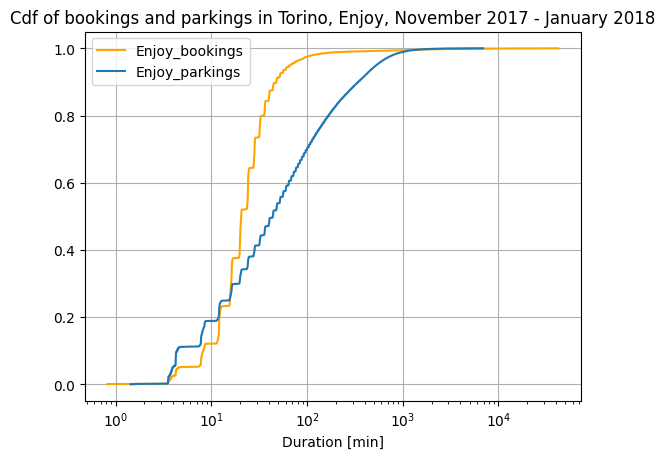

In [55]:
City = 'Torino'
Nov_Jan_Bookings = enjoy_permenant_booking.aggregate(piper(City,start_unix_time,end_unix_time))
Nov_Jan_Parkings = enjoy_permenant_parking.aggregate(piper(City,start_unix_time,end_unix_time))

booking_durations, booking_cumulated_data = normalizer(Nov_Jan_Bookings)
parking_durations, parking_cumulated_data = normalizer(Nov_Jan_Parkings)
plotter(booking_durations, booking_cumulated_data, parking_durations, parking_cumulated_data,City, 'Enjoy')

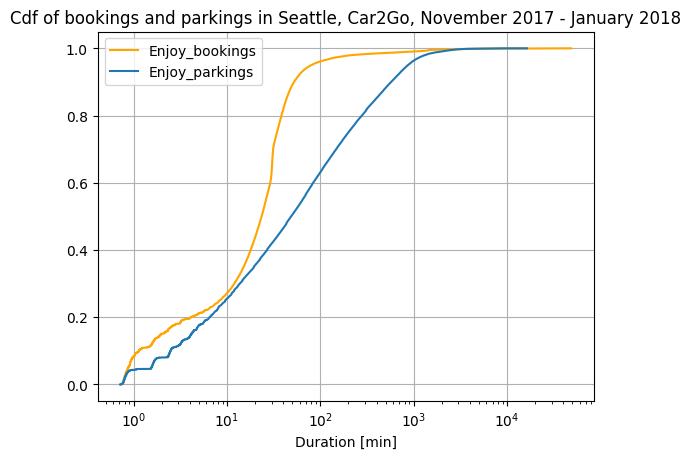

In [44]:
City = 'Seattle'
Nov_Jan_Bookings = permenant_booking.aggregate(piper(City,start_unix_time,end_unix_time))
Nov_Jan_Parkings = permenant_parking.aggregate(piper(City,start_unix_time,end_unix_time))

booking_durations, booking_cumulated_data = normalizer(Nov_Jan_Bookings)
parking_durations, parking_cumulated_data = normalizer(Nov_Jan_Parkings)

plotter(booking_durations, booking_cumulated_data, parking_durations, parking_cumulated_data,City, 'Car2Go')


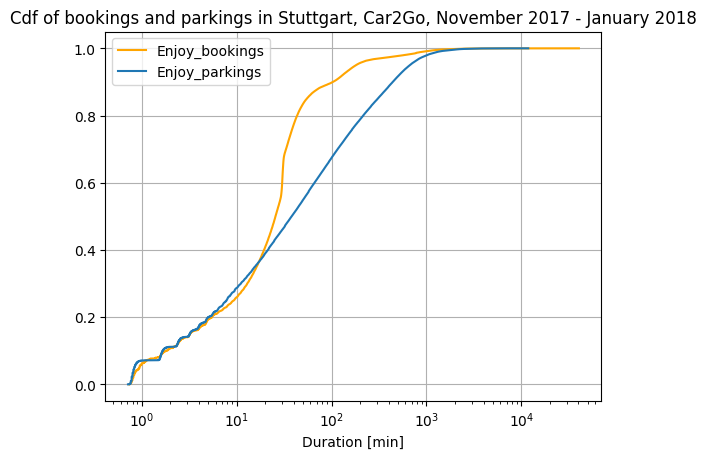

In [45]:
City = 'Stuttgart'
Nov_Jan_Bookings = permenant_booking.aggregate(piper(City,start_unix_time,end_unix_time))
Nov_Jan_Parkings = permenant_parking.aggregate(piper(City,start_unix_time,end_unix_time))

booking_durations, booking_cumulated_data = normalizer(Nov_Jan_Bookings)
parking_durations, parking_cumulated_data = normalizer(Nov_Jan_Parkings)

plotter(booking_durations, booking_cumulated_data, parking_durations, parking_cumulated_data,City, 'Car2Go')

In [26]:
def daysPipeline(city,start_unix_time,end_unix_time):
    return [
    {
        '$match': {
            'city': city,
            'init_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            },
            'final_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'duration': {
                '$divide': [
                    { '$subtract': ['$final_time', '$init_time'] },
                    60  # Divide by 60 to convert seconds to minutes
                ]
            },
            'weekDay': {'$dayOfWeek': '$init_date'},
        }
    },{
        '$sort': { #since the sorting is done in the pipeline, if the result is more than ram capacity then we will get an error. to fix this we can use external sorting with numpy
            'duration': 1  # Sorting by duration in ascending order
        }
    },
    {
        '$group': {
            '_id': {'week_day': '$weekDay'},
            'durations': {'$push': '$duration'}
        }
    }

]

def weeksPipeline(city,start_unix_time,end_unix_time):
    return [
    {
        '$match': {
            'city': city,
            'init_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            },
            'final_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'duration': {
                '$divide': [
                    { '$subtract': ['$final_time', '$init_time'] },
                    60  # Divide by 60 to convert seconds to minutes
                ]
            },
            'week': {'$isoWeek': '$init_date'},
        }
    },{
        '$sort': { #since the sorting is done in the pipeline, if the result is more than ram capacity then we will get an error. to fix this we can use external sorting with numpy
            'duration': 1  # Sorting by duration in ascending order
        }
    },
    {
        '$group': {
            '_id': {'week': '$week'},
            'durations': {'$push': '$duration'}
        }
    }

]

def plotter(data,City, Company, type):
    data.sort(key=lambda x:x["_id"][type])
    plt.figure()
    for it in range(len(data)):
        el=data[it]
        lenDurations=len(el["durations"])
        cumulate=np.zeros(lenDurations)
        for i in range (lenDurations):
            cumulate[i] = (i+1)/len(cumulate)
        plt.semilogx(el["durations"], cumulate,label = 'Day : '+str(it+1))
    # print("For the {} Day the average duration of bookings is:{}".format(it+1,np.mean(el["durations"])))
    plt.legend()
    plt.title('Cdf of bookings durations per Day in {}, enjoy, November 2017-January 2018'.format(City))
    plt.xlabel('Duration [min]')
    plt.ylabel('Percentage [%]')
    plt.show()

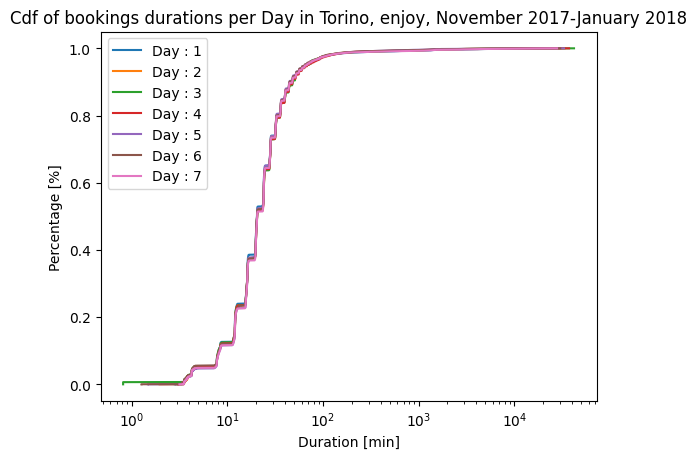

In [27]:
booking_days_data = enjoy_permenant_booking.aggregate(daysPipeline('Torino',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Torino','Enjoy','week_day')

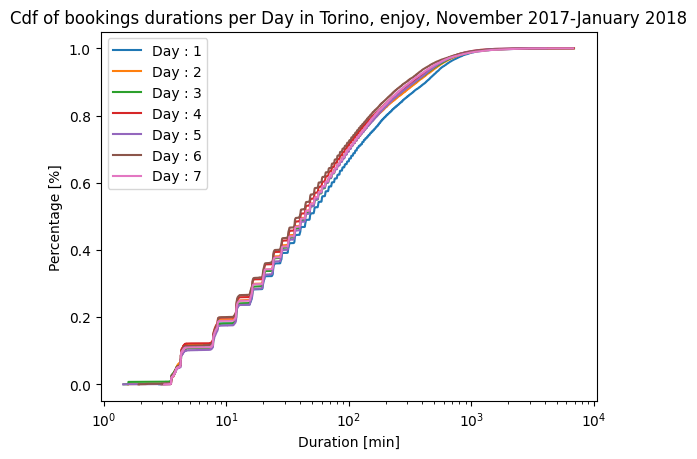

In [28]:
booking_days_data = enjoy_permenant_parking.aggregate(daysPipeline('Torino',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Torino','Enjoy','week_day')

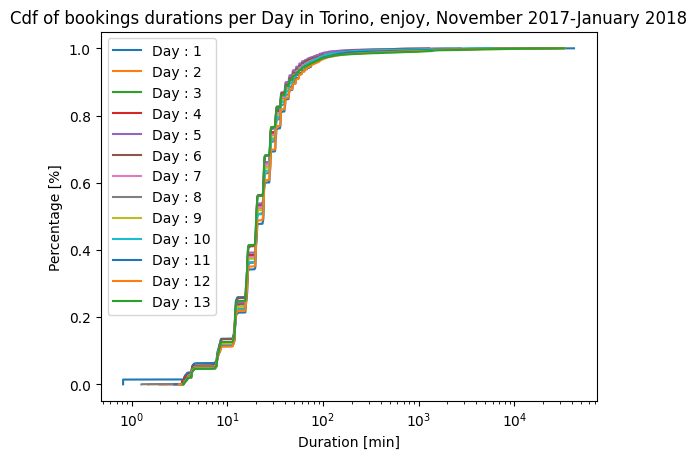

In [29]:
booking_days_data = enjoy_permenant_booking.aggregate(weeksPipeline('Torino',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Torino','Enjoy','week')

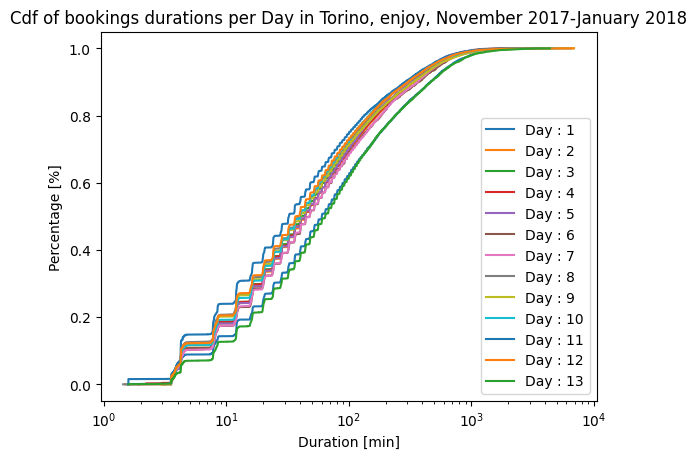

In [30]:
booking_days_data = enjoy_permenant_parking.aggregate(weeksPipeline('Torino',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Torino','Enjoy','week')

##### two different methods to get the cdf in week days or weeks -> 7 weeks days and 13 weeks

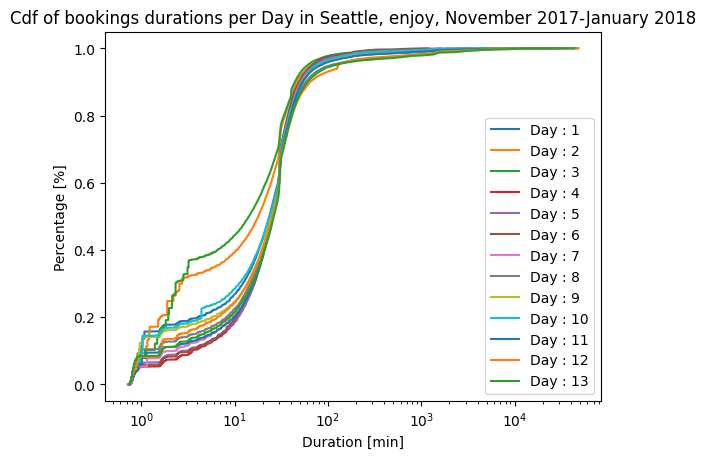

In [32]:
booking_days_data = permenant_booking.aggregate(weeksPipeline('Seattle',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Seattle','Car2Go','week')

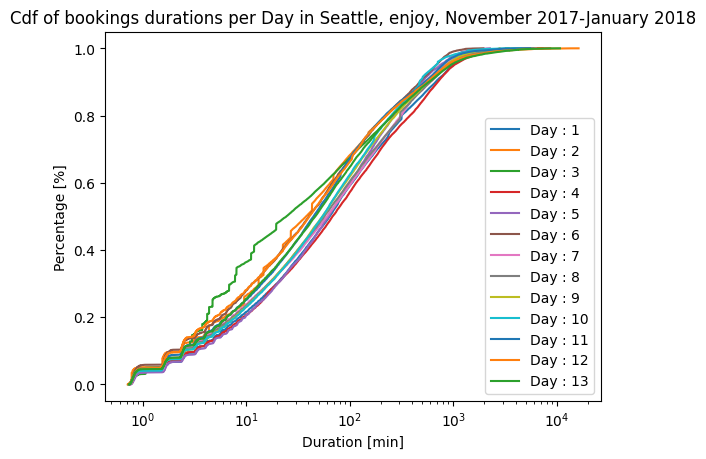

In [33]:
booking_days_data = permenant_parking.aggregate(weeksPipeline('Seattle',start_unix_time,end_unix_time))
plotter(list(booking_days_data),'Seattle','Car2Go','week')

#### 1.c per hour per day

In [177]:
from datetime import datetime, timedelta
def oopsPipeline(city,start_unix_time,end_unix_time):
    return [
    {
        '$match': {
            'city': city,
            'init_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            },
            'final_time': {
                '$gte': start_unix_time,
                '$lte': end_unix_time
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'duration': {
                '$divide': [
                    { '$subtract': ['$final_time', '$init_time'] },
                    60  # Divide by 60 to convert seconds to minutes
                ]
            },
            'day': {'$dayOfMonth': '$init_date'},
            'hour': {'$hour': '$init_date'},
            'date': {
                '$dateToString': {
                    'format': '%Y-%m-%d',
                    'date': '$init_date'
                }
            }
        }
    },
    {
        '$group':{
            '_id': {'day': '$day', 'hour': '$hour', 'date': '$date'},
            'total_count': {'$sum': 1},
        }
    },
    {
        '$sort': {
            '_id': 1,
        }
    },
    {
        '$group': {
            '_id': '$_id.date',
            'hours': {
                '$push': {
                    'hour': '$_id.hour',
                    'total_count': '$total_count'
                }
            }
        }
    },
    {
        '$sort': {
            '_id': 1,
            'hours.hour': 1
        }
    }
]


# def plotter(City, data):
#     # Convert date strings to datetime objects
#     # for entry in data:
#     #     entry['datetime'] = datetime.strptime(entry['date'], '%Y-%m-%d')

#     # Flatten the dataset for plotting
#     all_dates = [entry['datetime'] + timedelta(hours=entry['hour']) for entry in data]
#     all_values = [entry['total_count'] for entry in data]

#     # Plot the data
#     plt.figure(figsize=(12, 6))
#     plt.plot(all_dates, all_values, 'o-', markersize=8)
#     plt.xlabel('Date and Hour')
#     plt.ylabel('Total Count')
#     plt.title('Total Count for Each Hour Across Dates')
#     plt.grid(True)
#     plt.show()

[datetime.datetime(2017, 10, 31, 17, 0), datetime.datetime(2017, 10, 31, 18, 0), datetime.datetime(2017, 10, 31, 19, 0), datetime.datetime(2017, 10, 31, 20, 0), datetime.datetime(2017, 10, 31, 21, 0), datetime.datetime(2017, 10, 31, 22, 0), datetime.datetime(2017, 10, 31, 23, 0), datetime.datetime(2017, 11, 1, 0, 0), datetime.datetime(2017, 11, 1, 1, 0), datetime.datetime(2017, 11, 1, 2, 0), datetime.datetime(2017, 11, 1, 3, 0), datetime.datetime(2017, 11, 1, 4, 0), datetime.datetime(2017, 11, 1, 5, 0), datetime.datetime(2017, 11, 1, 6, 0), datetime.datetime(2017, 11, 1, 7, 0), datetime.datetime(2017, 11, 1, 8, 0), datetime.datetime(2017, 11, 1, 9, 0), datetime.datetime(2017, 11, 1, 10, 0), datetime.datetime(2017, 11, 1, 11, 0), datetime.datetime(2017, 11, 1, 12, 0), datetime.datetime(2017, 11, 1, 13, 0), datetime.datetime(2017, 11, 1, 14, 0), datetime.datetime(2017, 11, 1, 15, 0), datetime.datetime(2017, 11, 1, 16, 0), datetime.datetime(2017, 11, 1, 17, 0), datetime.datetime(2017, 11,

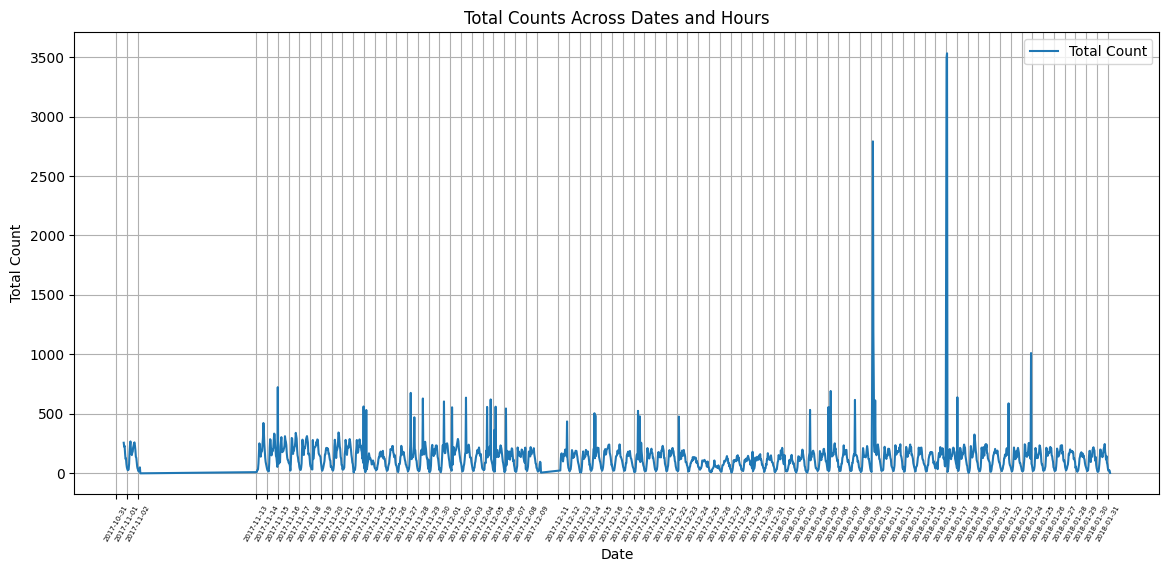

In [192]:

book_data = list(permenant_booking.aggregate(oopsPipeline('Seattle',start_unix_time,end_unix_time)))

flattened_data = []
for entry in book_data:
    date = entry['_id']
    for hour_data in entry['hours']:
        flattened_data.append({
            'date': date,
            'hour': hour_data['hour'],
            'total_count': hour_data['total_count']
        })
all_dates =[]
all_values = []
for entry in flattened_data:
    current_date = datetime.strptime(entry['date'], '%Y-%m-%d')
    all_dates.append(current_date+timedelta(hours=entry['hour']))
    all_values.append(entry['total_count'])
print(all_dates)
print(all_values)
#-------------------------------------------------

#-------------------------------------------------
unique_dates = sorted(set(date.date() for date in all_dates))

plt.figure(figsize=(14, 6))
plt.plot(all_dates, all_values, label='Total Count')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend()
plt.title('Total Counts Across Dates and Hours')
plt.grid(True)
plt.xticks(unique_dates,rotation=60, fontsize=5)
plt.show()

[{'date': datetime.datetime(2023, 1, 1, 0, 0), 'values': [3, 7, 6, 8, 2, 4, 5, 1, 10, 7, 9, 3, 1, 8, 2, 4, 2, 9, 7, 1, 10, 5, 4, 6]}, {'date': datetime.datetime(2023, 1, 2, 0, 0), 'values': [10, 7, 6, 1, 6, 6, 1, 10, 6, 2, 9, 4, 2, 9, 1, 7, 4, 8, 8, 2, 1, 6, 2, 4]}, {'date': datetime.datetime(2023, 1, 3, 0, 0), 'values': [2, 3, 3, 1, 4, 10, 4, 10, 5, 7, 8, 7, 9, 1, 5, 3, 5, 6, 10, 8, 10, 7, 3, 2]}, {'date': datetime.datetime(2023, 1, 4, 0, 0), 'values': [6, 6, 9, 5, 7, 9, 2, 1, 1, 7, 6, 9, 9, 4, 1, 1, 6, 7, 4, 6, 7, 9, 8, 4]}, {'date': datetime.datetime(2023, 1, 5, 0, 0), 'values': [6, 7, 1, 10, 3, 5, 3, 6, 7, 10, 6, 8, 2, 3, 8, 6, 2, 5, 4, 3, 2, 6, 10, 6]}, {'date': datetime.datetime(2023, 1, 6, 0, 0), 'values': [9, 9, 9, 8, 5, 6, 5, 8, 4, 9, 1, 6, 1, 5, 4, 4, 3, 5, 2, 5, 5, 5, 9, 4]}, {'date': datetime.datetime(2023, 1, 7, 0, 0), 'values': [4, 10, 10, 8, 1, 7, 4, 5, 2, 1, 1, 8, 1, 3, 4, 5, 3, 3, 8, 9, 2, 3, 4, 10]}, {'date': datetime.datetime(2023, 1, 8, 0, 0), 'values': [2, 10, 4, 7

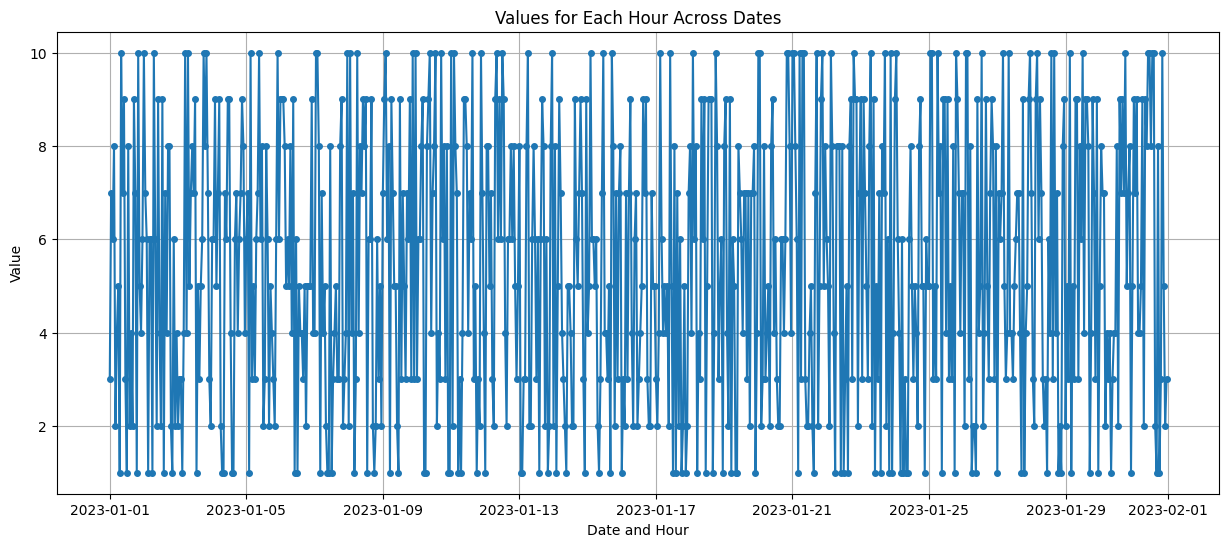

In [169]:
from datetime import datetime, timedelta
import random

# Create a dataset with random values for each hour of the day
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)
date_range = end_date - start_date

dataset = []

for i in range(date_range.days + 1):
    current_date = start_date + timedelta(days=i)
    values_for_date = [random.randint(1, 10) for _ in range(24)]
    dataset.append({'date': current_date, 'values': values_for_date})

# Flatten the dataset for plotting
all_dates = [entry['date'] + timedelta(hours=hour) for entry in dataset for hour in range(24)]
all_values = [value for entry in dataset for value in entry['values']]

print(dataset)
print(all_dates)
print(all_values)
# Create a figure and plot the data
plt.figure(figsize=(15, 6))

plt.plot(all_dates, all_values, 'o-', markersize=4)
plt.xlabel('Date and Hour')
plt.ylabel('Value')
plt.title('Values for Each Hour Across Dates')
plt.grid(True)
plt.show()